<a href="https://colab.research.google.com/github/ilidan16/ilidan16/blob/master/mandelbrot_parallel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
from threading import Thread

In [2]:
xmin = -2.5
xmax = 1.5
ymin = -2
ymax = 2
half_x = (xmin + xmax)/2

m = 500
n = 500
itr = 200
border = 2.0

def mandelbrot(xmin,xmax,m,n, ymin=ymin, ymax=ymax, itr=itr, border=border):
    """Возвращает множество Мальдеброта в разрешении m*n"""
    image = np.zeros((m, n))
    for i_y, y in enumerate(np.linspace(ymin, ymax, m)):
        for i_x, x in enumerate(np.linspace(xmin, xmax, n)):
            c = x + y * 1j
            z = 0
            for k in range(itr):
                z = z**2 + c
                if abs(z) > border:
                    image[i_y,i_x] = k
                    break
    return image

In [3]:
def simplicity():
    """Без распараллеливания"""
    t0 = time.time()
    mandelbrot(xmin,xmax,m,n)
    print(f"Time spent: {time.time() - t0}")

In [4]:
def threads():
    """Потоки"""
    left_image = np.zeros((m, int(n/2)))
    right_image = np.zeros((m, int(n/2)))
    def assign():
        global left_image
        global right_image
        left_image = mandelbrot(xmin,half_x,m,int(n/2))
        right_image = mandelbrot(half_x,xmax,m,int(n/2))

    t0 = time.time()
    if __name__ == '__main__':
        t1 = Thread(target=assign, args=())
        t2 = Thread(target=assign, args=())

        t1.start()
        t2.start()

        t1.join()
        t2.join()

    full_image_thread = np.concatenate((left_image, right_image), axis=1) #склеиваем
    print(f"Time spent on threads: {time.time() - t0}")

In [5]:
def processes():
    """Процессы"""
    t0 = time.time()
    if __name__ == '__main__':
        two_images = Pool().starmap(mandelbrot, [(xmin,half_x,m,int(n/2)),
                                             (half_x,xmax,m,int(n/2))])

        full_image_pool = np.concatenate((two_images[0], two_images[1]), axis=1) #склеиваем
    print(f"Time spent on processes: {time.time() - t0}")
    return full_image_pool

In [6]:
simplicity()
threads()
image = processes()

Time spent: 4.787046194076538
Time spent on threads: 9.852221250534058
Time spent on processes: 5.10687780380249


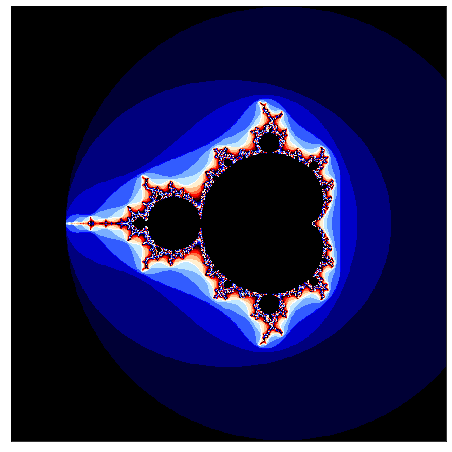

In [7]:
plt.figure(figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.imshow(-image, cmap="flag")
plt.show()
